In [8]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import cPickle as pickle
% matplotlib inline

In [2]:
from image_processing import get_paths
from image_processing import get_domi_color, vectorize_color_distribution, clustering_with_color
from image_processing import image_featurizer, clustering_with_feature

In [8]:
get_paths('', image=False)

['bed',
 'bookcase',
 'coffee_table',
 'desk',
 'dining_chair',
 'dining_table',
 'dresser',
 'nightstand',
 'office_chair',
 'sofa_all',
 'sofa_clustering_results']

## Create a new image table in the database:

- index = image path(filename)
- white background or not (bolean)
- one dominant color
- domi_color cluster label
- domi_color cluster centroid
- color distrubution
- color_dist cluster label
- color_dist cluster centroid

# Sofa

In [17]:
category = 'sofa'
paths = get_paths(category)
len(paths)

3763

In [ ]:
start_time =  time.time()
print start_time

# Color:
domi_color_dict = get_domi_color(paths, category)
time_1 =  time.time()
print 'get_domi_color: ', time_1 - start_time

Result from the cell above:
1443406617.49
gray
gray
gray
gray
gray
gray
get_domi_color:  4405.63884187 (I think the computer went to sleep.....)

In [25]:
paths = get_paths(category, white=True)
len(paths)

1858

In [26]:
time_1 = time.time()
color_dist_dict = vectorize_color_distribution(paths, category)
time_2 = time.time()
print 'vectorize_color_distribution: ', time_2 - time_1

vectorize_color_distribution:  1939.64887285


In [35]:
domi_color_dict_no_false = {}
for i in domi_color_dict:
    if type(domi_color_dict[i]) != bool:
        domi_color_dict_no_false[i] = domi_color_dict[i]

In [37]:
time_2 = time.time()
cluster_label_dict_domi, color_domi_centroids = clustering_with_color(domi_color_dict_no_false, category, domi_color=True)
time_3 =  time.time()
print 'clustering_with_color (domi): ', time_3 - time_2

cluster_label_dict_dist, color_dist_centroids = clustering_with_color(color_dist_dict, category, domi_color=False)
time_4 =  time.time()
print 'clustering_with_color (dist): ', time_4 - time_3

clustering_with_color (domi):  51.2427370548
clustering_with_feature (dist):  52.8415369987


# domi_color clustering works better than color_dist (on sofa)!

In [39]:
# Features:
feature_dict = image_featurizer(category, edge=False, svd=False)
time_5 =  time.time()
print 'image_featurizer: ', time_5 - time_4

cluster_label_dict_feature, feature_centroids = clustering_with_feature(feature_dict, category, 
                                                                svd=False, save_image=True, edge=False)
time_6 =  time.time()
print 'clustering_with_feature: ', time_6 - time_5

image_featurizer:  125.657418013
clustering_with_feature:  138.967031002


In [40]:
# Edged Features:
feature_dict_edge = image_featurizer(category, edge=True, svd=False)
time_7 =  time.time()
print 'image_featurizer (edge): ', time_7 - time_6

cluster_label_dict_edge, feature_centroids_edge = clustering_with_feature(feature_dict_edge, category, 
                                                                svd=False, save_image=True, edge=True)
time_8 =  time.time()
print 'clustering_with_feature (edge): ', time_8 - time_7

image_featurizer (edge):  36.3625459671
clustering_with_feature (edge):  113.339905024


In [42]:
# SVDed Features:
time_8 =  time.time()
feature_dict_svd = image_featurizer(category, edge=False, SVD=True)
time_9 =  time.time()
print 'image_featurizer (svd): ', time_9 - time_8

cluster_label_dict_svd, feature_centroids_svd = clustering_with_feature(feature_dict_svd, category, 
                                                                SVD=True, save_image=True, edge=False)
time_10 =  time.time()
print 'clustering_with_feature (svd): ', time_10 - time_9

image_featurizer (svd):  448.625341892
clustering_with_feature (svd):  43.4509789944


# Run on all 11175 sofa images (sofa + sofa_bed + futon + loveseat)

In [9]:
category = 'sofa_all'
paths = get_paths(category)
len(paths)

11175

In [10]:
start_time =  time.time()
print start_time

# Color:
domi_color_dict = get_domi_color(paths, category)
time_1 =  time.time()
print 'get_domi_color: ', time_1 - start_time

1443504378.28
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
gray
get_domi_color:  4237.45315313


//anaconda/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


In [11]:
paths = get_paths(category, white=True)
len(paths)

4659

In [12]:
time_1 = time.time()
color_dist_dict = vectorize_color_distribution(paths, category)
time_2 = time.time()
print 'vectorize_color_distribution: ', time_2 - time_1

vectorize_color_distribution:  4311.78670192


In [13]:
domi_color_dict_no_false = {}
for i in domi_color_dict:
    if type(domi_color_dict[i]) != bool:
        domi_color_dict_no_false[i] = domi_color_dict[i]

In [14]:
time_2 = time.time()
cluster_label_dict_domi, color_domi_centroids = clustering_with_color(domi_color_dict_no_false, category, domi_color=True)
time_3 =  time.time()
print 'clustering_with_color (domi): ', time_3 - time_2

cluster_label_dict_dist, color_dist_centroids = clustering_with_color(color_dist_dict, category, domi_color=False)
time_4 =  time.time()
print 'clustering_with_color (dist): ', time_4 - time_3

clustering_with_color (domi):  120.655131102
clustering_with_color (dist):  122.483716965


In [17]:
# Features:
time_4 =  time.time()
feature_dict = image_featurizer(category, edge=False, SVD=False)
time_5 =  time.time()
print 'image_featurizer: ', time_5 - time_4

cluster_label_dict_feature, feature_centroids = clustering_with_feature(feature_dict, category, 
                                                                SVD=False, save_image=True, edge=False)
time_6 =  time.time()
print 'clustering_with_feature: ', time_6 - time_5

# Edged Features:
feature_dict_edge = image_featurizer(category, edge=True, SVD=False)
time_7 =  time.time()
print 'image_featurizer (edge): ', time_7 - time_6

cluster_label_dict_edge, feature_centroids_edge = clustering_with_feature(feature_dict_edge, category, 
                                                                SVD=False, save_image=True, edge=True)
time_8 =  time.time()
print 'clustering_with_feature (edge): ', time_8 - time_7

# SVDed Features:
time_8 =  time.time()
feature_dict_svd, U, sigma, VT = image_featurizer(category, edge=False, SVD=True)
time_9 =  time.time()
print 'image_featurizer (svd): ', time_9 - time_8

cluster_label_dict_svd, feature_centroids_svd = clustering_with_feature(feature_dict_svd, category, 
                                                                SVD=True, save_image=True, edge=False)
time_10 =  time.time()
print 'clustering_with_feature (svd): ', time_10 - time_9

image_featurizer:  62.9440801144
clustering_with_feature:  284.190518856
image_featurizer (edge):  816.846856117
clustering_with_feature (edge):  228.436863899
image_featurizer (svd):  1318.41898584
clustering_with_feature (svd):  113.430192947


# Kernal down - start over:

In [5]:
category = 'sofa_all'
paths = get_paths(category)
len(paths)

start_time =  time.time()
# Color:
domi_color_dict = get_domi_color(paths, category)
time_1 =  time.time()
print 'get_domi_color: ', time_1 - start_time

paths = get_paths(category, white=True)
len(paths)


color_dist_dict = vectorize_color_distribution(paths, category)
time_2 = time.time()
print 'vectorize_color_distribution: ', time_2 - time_1


domi_color_dict_no_false = {}
for i in domi_color_dict:
    if type(domi_color_dict[i]) != bool:
        domi_color_dict_no_false[i] = domi_color_dict[i]

# of grayscaled photos:  0
get_domi_color:  4531.230968
vectorize_color_distribution:  4572.42682314


In [6]:
time_2 =  time.time()
cluster_label_dict_domi, color_domi_centroids = clustering_with_color(domi_color_dict_no_false, category, 
                                                                      n_clusters=10, domi_color=True)
time_3 =  time.time()
print 'clustering_with_color (domi): ', time_3 - time_2

cluster_label_dict_dist, color_dist_centroids = clustering_with_color(color_dist_dict, category, 
                                                                      n_clusters=10, domi_color=False)
time_4 =  time.time()
print 'clustering_with_color (dist): ', time_4 - time_3


# Features:
time_4 =  time.time()
feature_dict, features = image_featurizer(category, edge=False, SVD=False)
time_5 =  time.time()
print 'image_featurizer: ', time_5 - time_4

cluster_label_dict_feature, feature_centroids = clustering_with_feature(feature_dict, category, n_clusters=10, 
                                                                SVD=False, save_image=False, edge=False)
time_6 =  time.time()
print 'clustering_with_feature: ', time_6 - time_5


# SVDed Features:
time_8 =  time.time()
feature_dict_svd, U, sigma, VT = image_featurizer(category, edge=False, SVD=True)
time_9 =  time.time()
print 'image_featurizer (svd): ', time_9 - time_8

cluster_label_dict_svd, feature_centroids_svd = clustering_with_feature(feature_dict_svd, category, n_clusters=10, 
                                                                SVD=True, save_image=False, edge=False)
time_10 =  time.time()
print 'clustering_with_feature (svd): ', time_10 - time_9

clustering_with_color (domi):  124.462813854
clustering_with_color (dist):  111.564160109
image_featurizer:  63.1175310612
clustering_with_feature:  172.232182026
image_featurizer (svd):  739.55894804
clustering_with_feature (svd):  1.91493701935


In [9]:
# pickled:
# domi_color_dict
# color_dist_dict
# features, U, sigma, VT

#--------------------------------

# domi_color_dict_no_false
# cluster_label_dict_domi
# color_domi_centroids

# cluster_label_dict_dist
# color_dist_centroids

# feature_dict
# cluster_label_dict_feature
# feature_centroids

# feature_dict_svd
# cluster_label_dict_svd
# feature_centroids_svd

with open('wayfair/pickle/sofa_domi_color_dict.pkl', 'w') as f:
    pickle.dump(domi_color_dict, f)
with open('wayfair/pickle/sofa_color_dist_dict.pkl', 'w') as f:
    pickle.dump(color_dist_dict, f)

In [ ]:
with open('wayfair/pickle/sofa_features.pkl', 'w') as f:
    pickle.dump(features, f)
with open('wayfair/pickle/sofa_U.pkl', 'w') as f:
    pickle.dump(U, f)
with open('wayfair/pickle/sofa_sigma.pkl', 'w') as f:
    pickle.dump(sigma, f)
with open('wayfair/pickle/sofa_VT.pkl', 'w') as f:
    pickle.dump(VT, f)

In [ ]:
with open('wayfair/pickle/sofa_domi_color_dict.pkl') as f:
    domi_color_dict = pickle.load(f)


In [21]:
U.shape, sigma.shape, VT.shape, features.shape

((4659, 4659), (4659,), (22500, 22500), (4659, 22500))

In [13]:
sigma_matrix = np.diag(sigma[:20])

In [15]:
sigma_inv = np.linalg.inv(sigma_matrix)
VT_inv = np.linalg.inv(VT)

In [16]:
test_matrix = np.dot(np.dot(features, VT_inv), sigma_inv)

ValueError: shapes (4659,22500) and (4659,4659) not aligned: 22500 (dim 1) != 4659 (dim 0)

In [ ]:
np.allclose(test_matrix, U)

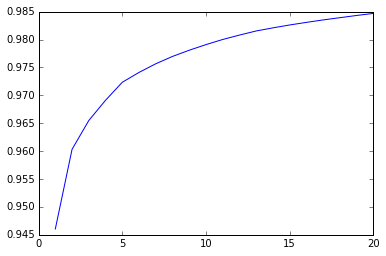

In [11]:
k = 20
plt.plot(range(1, k+1), np.cumsum(sigma[:k]**2) / np.sum(sigma**2))

# To do: 
## put color data info a dataframe -> save as json!!
* check & compare feature clustering results (general, edge & svd)
* do edge&svd ?